<a href="https://colab.research.google.com/github/acaaattunde2012/Capstone-Projects/blob/main/black_friday_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

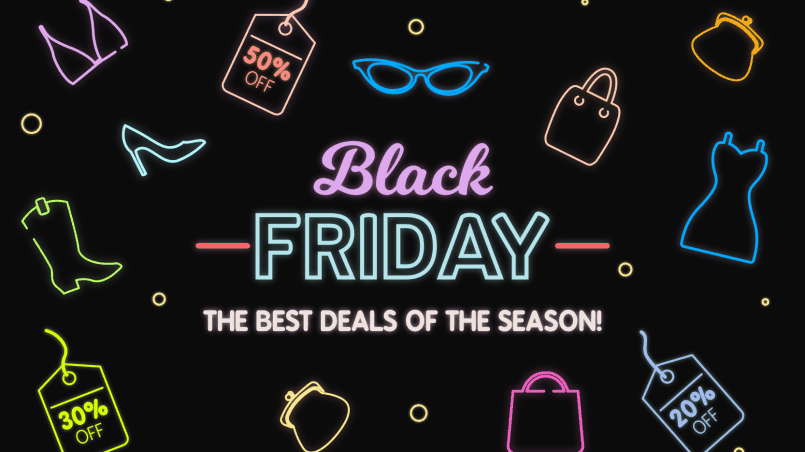

### Black Friday ML Prediction

**About The Dataset**

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month during their black Fridays. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month. In total there are twelve(12) columns with 783667 rows in the combined dataset except for columns with missing values.

Data Source:
https://www.kaggle.com/datasets/sdolezel/black-*friday

**Problem Statement:**

In order to increase sales through customer analytics. They want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products. Understand trend and pattern between sales and demographic and other sales triggers with a view to understanding their customers preferneces and purchase behaviours.

In [7]:
# Import the dependencies
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Import the datasets
bf_data_train = pd.read_csv('/content/Black Friday ML/train.csv')
bf_data_test = pd.read_csv('/content/Black Friday ML/test.csv')

In [9]:
# Show the first 5 rows of the training dataset
bf_data_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [10]:
# Check the no of columns and row in the train sets
bf_data_train.shape

(550068, 12)

In [11]:
bf_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [12]:
# Show the first 5 rows of the test sets
bf_data_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [13]:
# Check the no of columns and row in the test sets
bf_data_test.shape

(233599, 11)

In [14]:
bf_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [15]:
# We need to merge the two(2) datasets for proper EDA
# bf_data = bf_data_train.append(bf_data_test)

bf_data=pd.concat([bf_data_train, bf_data_test])

In [16]:
# Show the first 5 rows of merged dataset
bf_data.head()
bf_data.shape

(783667, 12)

In [17]:
# Confirm the accuracy of the merging
confirm = len(bf_data_train)+len(bf_data_test)
print(f'The total rows of both train and test sets is: {confirm}')

The total rows of both train and test sets is: 783667


In [18]:
# Show the last 5 rows _of the merged dataset
bf_data.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN
233598,1006039,P00316642,F,46-50,0,B,4+,1,4,5.0,NaN,NaN


In [19]:
# Show the columns in the merged dataset
bf_data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [20]:
# Drop the features believed to be unimportant
bf_data.drop(['User_ID', 'Product_ID'], axis = 'columns', inplace= True)

In [21]:
# Show the first 5 rows 
bf_data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [22]:
# Show the datatype of merged dataset
bf_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  object 
 1   Age                         783667 non-null  object 
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  object 
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          537685 non-null  float64
 8   Product_Category_3          237858 non-null  float64
 9   Purchase                    550068 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 65.8+ MB


The following categorical features need to be converted to numeric for prediction purpose
* Gender
* Age

In [23]:
# Show the uniqueness of the stated features
bf_data.Gender.unique()

array(['F', 'M'], dtype=object)

In [24]:
# Convert Gender to numeric feature
bf_data['Gender'] = bf_data['Gender'].map({'F': 0, 'M': 1 })
#bf_data.head()


In [25]:
bf_data['Gender'].unique()
bf_data['Gender'].value_counts()

1    590031
0    193636
Name: Gender, dtype: int64

In [26]:
# Convert Gender to numeric feature
bf_data['Age'].value_counts()
#bf_data['Age'].unique()

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

In [27]:
bf_data['Age'] = bf_data['Age'].map({'0-17': 1, '18-25': 2, '26-35': 3, '36-45': 4, '46-50': 5, '51-55': 6, '55+': 7 })
bf_data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [28]:
bf_data['Age'].value_counts()

3    313015
4    156724
2    141953
5     65278
6     54784
7     30579
1     21334
Name: Age, dtype: int64

In [29]:
# Let us view other categorical feature
bf_data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [30]:
# Let us remove + sign and convert to int64 datatype
bf_data['Stay_In_Current_City_Years']= bf_data['Stay_In_Current_City_Years'].str.replace('+','')

<ipython-input-30-833596fe5c09>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bf_data['Stay_In_Current_City_Years']= bf_data['Stay_In_Current_City_Years'].str.replace('+','')


In [31]:
bf_data['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [32]:
# Convert to int64 datatype
bf_data['Stay_In_Current_City_Years']=bf_data['Stay_In_Current_City_Years'].astype(int)

In [33]:
bf_data.info()
 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  object 
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          537685 non-null  float64
 8   Product_Category_3          237858 non-null  float64
 9   Purchase                    550068 non-null  float64
dtypes: float64(3), int64(6), object(1)
memory usage: 65.8+ MB


In [34]:
# Convert city categorical feature to numeric
bf_data['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [35]:
bf_data['City_Category']=bf_data['City_Category'].map({'A': 0, 'B': 1, 'C': 2})

In [36]:
bf_data['City_Category'].unique()

array([0, 2, 1])

In [37]:
bf_data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,0,2,0,3,NaN,NaN,8370.0
1,0,1,10,0,2,0,1,6.0,14.0,15200.0
2,0,1,10,0,2,0,12,NaN,NaN,1422.0
3,0,1,10,0,2,0,12,14.0,NaN,1057.0
4,1,7,16,2,4,0,8,NaN,NaN,7969.0


In [38]:
# Check for missing values
bf_data.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [39]:
# Let us fill the missing data using the mode
bf_data['Product_Category_2'].fillna(bf_data['Product_Category_2'].mean(), inplace = True)
bf_data['Product_Category_2'] = bf_data['Product_Category_2'].astype(int)

In [40]:
bf_data['Product_Category_3'].fillna(bf_data['Product_Category_3'].mean(),inplace=True)
bf_data['Product_Category_3'] = bf_data['Product_Category_3'].astype(int)

In [41]:
bf_data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,0,2,0,3,9,12,8370.0
1,0,1,10,0,2,0,1,6,14,15200.0
2,0,1,10,0,2,0,12,9,12,1422.0
3,0,1,10,0,2,0,12,14,12,1057.0
4,1,7,16,2,4,0,8,9,12,7969.0


In [42]:
# Under-sampling in the target column - Purchase
new_sample = bf_data['Purchase'].sample(n=233599)
existing_targetdata = bf_data['Purchase']

In [43]:
existing_targetdata

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
233594        NaN
233595        NaN
233596        NaN
233597        NaN
233598        NaN
Name: Purchase, Length: 783667, dtype: float64

In [44]:
print(f'The no of records in the target variable before re-sampling is: {len(bf_data_train.Purchase)}')

The no of records in the target variable before re-sampling is: 550068


In [45]:
bf_data['Purchase'] = pd.concat([existing_targetdata,new_sample], ignore_index= True)

print(f'The no of records in the target variable after re-sampling is: {len(bf_data.Purchase)}')

The no of records in the target variable after re-sampling is: 783667


In [46]:
bf_data.Purchase

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
233594     6862.0
233595    18984.0
233596    19298.0
233597    11937.0
233598     3554.0
Name: Purchase, Length: 783667, dtype: float64

In [47]:
bf_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  int64  
 8   Product_Category_3          783667 non-null  int64  
 9   Purchase                    783667 non-null  float64
dtypes: float64(1), int64(9)
memory usage: 65.8 MB


Gender Distribution Analysis And Visualization

In [50]:
bf_data['Gender'].value_counts()

1    590031
0    193636
Name: Gender, dtype: int64

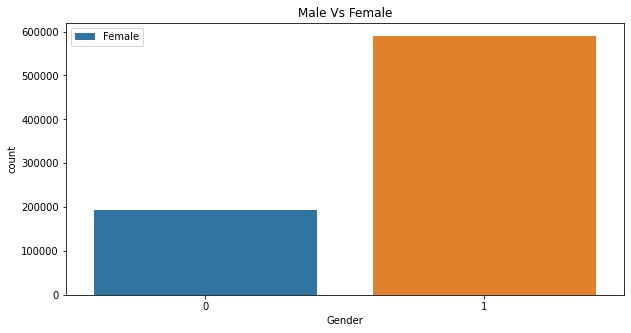

In [75]:

plt.figure(figsize=(10,5), facecolor = 'white')
sns.countplot(x='Gender', data = bf_data)
plt.title('Male Vs Female')
plt.legend(['Female','Male'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


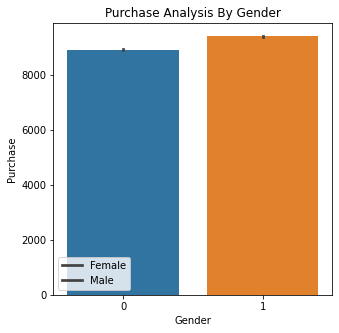

In [62]:
plt.figure(figsize=(5,5), facecolor = 'white')
sns.barplot(bf_data['Gender'], bf_data['Purchase'] )
plt.title('Purchase Analysis By Gender')
plt.legend(['Female','Male'])
plt.show()

**Observation**
1. There are more males who made purchases on the black Friday than their female counterparts.

2. The total purcahses made by male is slightly more than the female counterpart.

2. Even though the no of males and purchases made by them  are more than the female, avarage purchases by female is far more than their male counterpart.

Age Distribution Analysis And Visualization

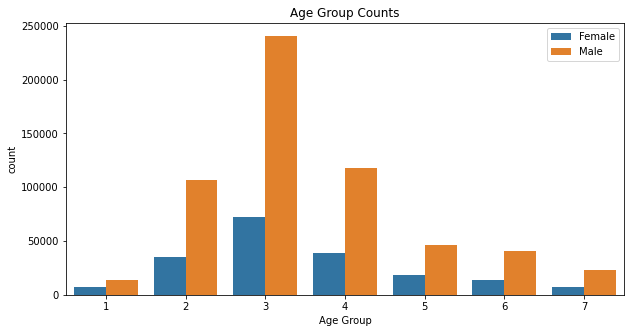

In [93]:
plt.figure(figsize=(10,5), facecolor = 'white')
sns.countplot(x='Age', data = bf_data, hue = 'Gender')
plt.title('Age Group Counts')
plt.xlabel('Age Group')
plt.legend(['Female', 'Male'])
plt.show()

**Observations:**
1. Age group 3 (i.e 26 - 35) dominates the entire age distribution by almost 50 percent.

2. Each of the groups has more male than their femael counterpart.


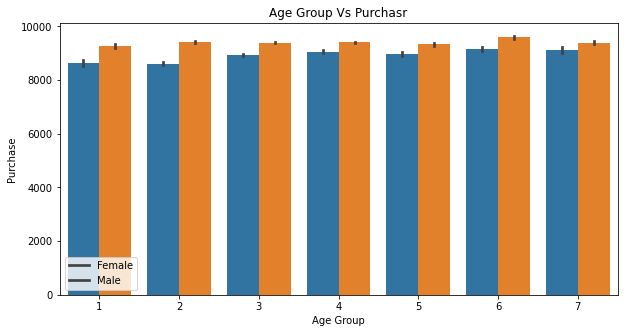

In [98]:
plt.figure(figsize=(10,5), facecolor = 'white')
sns.barplot(x='Age', y = 'Purchase', data = bf_data, hue = 'Gender')
plt.title('Age Group Vs Purchasr')
plt.xlabel('Age Group')
plt.legend(['Female', 'Male'])
plt.show()

Building A Predictive Model

For the purposr of this task, we are going to employ the following models. Thereafter, our choice of model is based on the algorithms that produces the best result in terms of its metrics.

1. Decision Tree Regressor
2. Linear Regression 
3. Lasso Regression

**Import the necessary model building dependencies**

In [182]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, ridge_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


**Split the dataset into feature and target variables**

In [103]:
X = bf_data.iloc[:,:-1]     #----- feature variables
y=  bf_data.iloc[:,-1]      #------ target variable

In [104]:
X

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,1,10,0,2,0,3,9,12
1,0,1,10,0,2,0,1,6,14
2,0,1,10,0,2,0,12,9,12
3,0,1,10,0,2,0,12,14,12
4,1,7,16,2,4,0,8,9,12
...,...,...,...,...,...,...,...,...,...
233594,0,3,15,1,4,1,8,9,12
233595,0,3,15,1,4,1,5,8,12
233596,0,3,15,1,4,1,1,5,12
233597,0,5,1,2,4,0,10,16,12


In [105]:
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
233594     6862.0
233595    18984.0
233596    19298.0
233597    11937.0
233598     3554.0
Name: Purchase, Length: 783667, dtype: float64

**Train Test Split**

In [126]:
x_train,x_test,y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=42)
print(f' The shape of the training split is - {x_train.shape, y_train.shape}')
print(f' The shape of the testing split is - {x_test.shape, y_test.shape}')

 The shape of the training split is - ((626933, 9), (626933,))
 The shape of the testing split is - ((156734, 9), (156734,))


In [178]:
# Create an instance of the models
dt_model = DecisionTreeRegressor()
lr_model = LinearRegression()
la_model = Lasso(alpha =1.0)


In [179]:
# Train the models with the trainin sets
dt_model.fit(x_train, y_train)
lr_model.fit(x_train, y_train)
la_model.fit(x_train, y_train)

Lasso()

In [187]:
# Make prediction using the test sets
dt_prediction = dt_model.predict(x_test)
lr_prediction =lr_model.predict(x_test)
la_prediction =la_model.predict(x_test)

**Model Performance Evaluation Metrics**

**Mean Squared Error**

In [193]:
print('The mean squared error for Decision Tree Model is ---> ', np.round(mean_squared_error(y_test, dt_prediction)))
print('The mean squared error for Linear Regression Model is ---> ', np.round(mean_squared_error(y_test, lr_prediction)))
print('The mean squared error for Lasso Regression Model is ---> ', np.round(mean_squared_error(y_test, la_prediction)))

The mean squared error for Decision Tree Model is --->  21783013.0
The mean squared error for Linear Regression Model is --->  23412915.0
The mean squared error for Lasso Regression Model is --->  23412844.0


**Mean Absolute Error**

In [197]:
print('The mean absolute error for Decision Tree Model is ---> ', np.round(mean_absolute_error(y_test, dt_prediction)))
print('The mean absolute error for Linear Regression Model is ---> ', np.round(mean_absolute_error(y_test, lr_prediction)))
print('The mean absolute error for Lasso Regression Model is ---> ', np.round(mean_absolute_error(y_test, la_prediction)))

The mean absolute error for Decision Tree Model is --->  3388.0
The mean absolute error for Linear Regression Model is --->  3824.0
The mean absolute error for Lasso Regression Model is --->  3825.0


**R Square**

In [198]:
print('The R-square error for Linear Regression Model is ---> ', r2_score(y_test, lr_prediction))
print('The R-square error for Lasso Regression Model is ---> ',  r2_score(y_test, lr_prediction))

The R-square error for Linear Regression Model is --->  0.06485388468581266
The R-square error for Lasso Regression Model is --->  0.06485388468581266


**Model Selection Decision**

From the above evaluation, Decision Tree Regressor looks a bit better than the rest of the model